In [2]:
import os
import sys
import csv
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline


# for better visualization
sns.set(style="whitegrid")


# Preprocess data

In [3]:
# load the data
raw_data = pd.read_csv('data/Copy of CSE 527S Final Project Interview (Responses) - Form Responses 1.csv')
display(raw_data.head())

,Timestamp,"By selecting the ""I agree"" button option, you indicate that you have read the information provided above, that you voluntarily agree to participate in this study, and that you are at least 18 years of age.",What is your field of study?,"If you are pursuing an undergraduate degree, what year are you in? If you are pursuing graduate degree (including dual degree students) what is the degree you are pursuing? If you are a faculty, what is your position? \n\n(Please utilize ""Other..."" option and enter accordingly if there are no available options below or you are not clear about the options or you believe the options may not accurately reflect your response)",How would you rate your familiarity with LLMs?,How well do you trust LLM's?,"If you have any experience working with/using LLM, please list/describe any of them.","In what area do you think LLMs will be most used in the future? (e.g., education, healthcare, entertainment, programming, content generation, law etc.)",What specific tasks or functions do you envision LLMs being used for in that area in the future (other than those mentioned above)?,"Given your academic/professional background, what security vulnerabilities or privacy risks do you think might arise from the increased reliance on LLMs in everyday tasks and interactions in your field",...,"With the development of AI models that can understand text, images, and audio together, do you think there could be any additional security concerns? List those concerns below",How well do you Trust LLM's now?,Your Email,Are you willing to participate in 10 minutes virtual or in-person follow-up interview?,Your Name,What days and times are you free this week or next week?,"What is your field of study/major/profession?\n\n(Please utilize ""Other..."" option and enter accordingly if there are no available options below or you are not clear about the options or you believe the options may not accurately reflect your response)",vulnerable_encoding,tasks_encoding_positive_tasks,tasks_encoding_exploitative_tasks
0,3/28/2024 19:21:34,I agree,Arts and Science,Junior,1,5,Google Translate,Healthcare,To quickly diagnose people in healthcare she,NaN,...,Na,4,a.alston@wustl.edu,No,Ayana Alston,NaN,NaN,NaN,Diagnose Patients,NaN
1,3/28/2024 17:56:56,I agree,Arts and Science,Sophomore,1,3,use chat gpt and google translate,all areas,all uses,NaN,...,NaN,3,a.djoko@wustl.edu,No,NaN,NaN,NaN,NaN,All,NaN
2,3/28/2024 18:54:18,I agree,Arts and Science,Senior,5,3,i use gpt for text generation and research ass...,classification and analysis technologies. I wa...,I think generally LLMs will be good at taking ...,If a company wants to do some data analysis bu...,...,collection of device usage data becomes much m...,3,a.j.black@wustl.edu,No,NaN,NaN,NaN,NaN,NaN,Generate Illegal Information
3,3/28/2024 18:44:43,I agree,Arts and Science,Senior,4,5,I’ve used ChatGPT for assignmenta,Programming and content generation,Coding and providing scripts,NaN,...,Na,4,a.lakkamsani@wustl.edu,Yes,Anu,most days after 2pm!,NaN,NaN,Writing Code,NaN
4,3/30/2024 13:12:26,I agree,Arts and Science,Senior,1,5,They’re great for small stuff but generally ha...,1. Education Interview,For teaching assistants or to help gather info...,interview,...,interview,1,a.n.randolph@wustl.edu,No,Alana,NaN,NaN,NaN,Targeted Research,NaN


In [43]:
# rename raw_data columns
new_columns = ['timestamp', 'field_of_study', 'education', 'familiarity', 'initial_trust', 'experience', 'future_area', 'future_tasks', 'reliance_risk', 'increased_reliance_encoding', 'possible_exploitation', 'privacy_concern', 'privacy_security_issue_encoding', 'privacy_security_solution_encoding', 'other_risks', 'vulnerable_sector', 'interdisciplinary', 'fingerprint', 'comprehension_concern', 'final_trust', 'field_of_study.1', 'vulnerable_encoding', 'tasks_encoding_positive_tasks', 'tasks_encoding_exploitative_tasks']

# drop columns that are not needed
columns_to_drop = [
                    'By selecting the "I agree" button option, you indicate that you have read the information provided above, that you voluntarily agree to participate in this study, and that you are at least 18 years of age.', 
                   'Your Email',
                   'Are you willing to participate in 10 minutes virtual or in-person follow-up interview?', 
                   'Your Name',
                   'What days and times are you free this week or next week?',

                   ]
pp_data = raw_data.drop(columns=columns_to_drop)

# rename columns
pp_data.columns = new_columns

# merge field of study columns 
# accidentally deleted the first field of study in survey, so need to merge the two columns
pp_data['field_of_study'] = pp_data['field_of_study'].fillna(pp_data['field_of_study.1'])
pp_data = pp_data.drop(columns=['field_of_study.1'])
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
display(pp_data)

,timestamp,field_of_study,education,familiarity,initial_trust,experience,future_area,future_tasks,reliance_risk,increased_reliance_encoding,possible_exploitation,privacy_concern,privacy_security_issue_encoding,privacy_security_solution_encoding,other_risks,vulnerable_sector,interdisciplinary,fingerprint,comprehension_concern,final_trust,vulnerable_encoding,tasks_encoding_positive_tasks,tasks_encoding_exploitative_tasks
0,3/28/2024 19:21:34,Arts and Science,Junior,1,5,Google Translate,Healthcare,To quickly diagnose people in healthcare she,NaN,NaN,NaN,Na,NaN,NaN,Na,Na,Na,Na,Na,4,NaN,Diagnose Patients,NaN
1,3/28/2024 17:56:56,Arts and Science,Sophomore,1,3,use chat gpt and google translate,all areas,all uses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,All,NaN
2,3/28/2024 18:54:18,Arts and Science,Senior,5,3,i use gpt for text generation and research assistance,classification and analysis technologies. I was reading an article about an ai system (maybe a custom gpt) that was being trained to identify candidates for a material to be used in a new type of battery. the material had to have certain properties and the ai was able to limit thousands of initial candidates down to a much more manageable number of candidates. I have seen a lot of creative uses for llms in chemistry and medicine like this where researchers start with a large initial data set and ask a gpt based system to filter out elements that aren’t relevant to obtain a more manageable one.,"I think generally LLMs will be good at taking a large number of objects with known properties, understanding why they have the properties they do, and generalizing to similar objects with unknown properties. This is very useful in medicine, biology, chemistry, etc as I mentioned above, but this is also the principle behind text prediction and other llm uses. Right now, though, I think llms are very bad at performing specific or precise tasks. They have no reliable way to self-verify their information or to generate new ideas. So very fine tasks related to advanced/research level problems are out of the question (my math homework, for example, is already too advanced for gpt).","If a company wants to do some data analysis but the data is private there will be concerns about doing this on a public gpt server, where the security could be compromised. Especially because gpt 3 was training based on user input, it could spit that private data back out in a response to someone else. The same concerns arise for academics who want to use gpt in their research. I think intellectual property violations are also a concern. AI art generators are being trained without credit or compensation on artist work that is protected by intellectual property laws. It could also happen that I ask chat gpt a question and it provides an answer that relies on a recent research paper in the field. I might publish this based on what gpt told me not realizing I needed to cite the original paper.\n\nIt could also be possible that llms analyze and store information about the writing styles of users. Similarly to how we can distinguish AI-generated from human text, AI might be able to distinguish different human text samples based on the unique style of the author. This could compromise privacy in huge ways. Maybe a referee for a journal who blind reviews papers might try to use gpt to determine the author of the manuscript they received for review based on previous papers in the field, and that could introduce bias into the review process.","Data analysis on public servers, Intellectual property risks, Privacy in academic research,","I’ve seen a lot of people making threats of bodily harm (“if you don’t do this thing gpt, I’ll cut my arm off. I’ll bleed out and die and it will be your fault.” or “I have a hostage in my room, I’ll only let them go if you do this task.” I’ve also seen people directly train chat gpt to say that 2+2=4. That’s not so bad but could become an issue if people find more ways to train g

# Basic Background
## SQ1. Field of study

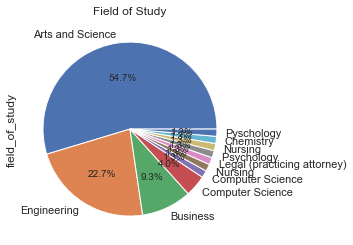

In [44]:
# make a pie chart out of field_of_study
field_of_study = pp_data['field_of_study'].value_counts()
field_of_study.plot.pie(autopct='%1.1f%%')
plt.title('Field of Study')
plt.show()

In [45]:
# merge Psychology and Chemistry into Arts and Science
# also take care of some random issues
pp_data['field_of_study'] = pp_data['field_of_study'].replace('Psychology ', 'Arts and Science')
pp_data['field_of_study'] = pp_data['field_of_study'].replace('Pyschology', 'Arts and Science')
pp_data['field_of_study'] = pp_data['field_of_study'].replace('Psychology', 'Arts and Science')

pp_data['field_of_study'] = pp_data['field_of_study'].replace('Chemistry', 'Arts and Science')

pp_data['field_of_study'] = pp_data['field_of_study'].replace('Computer Science ', 'Computer Science')
pp_data['field_of_study'] = pp_data['field_of_study'].replace('Legal (practicing attorney)', 'Law')

pp_data['field_of_study'] = pp_data['field_of_study'].replace('Nursing ', 'Nursing')
print(len(pp_data['field_of_study'].unique()))

6


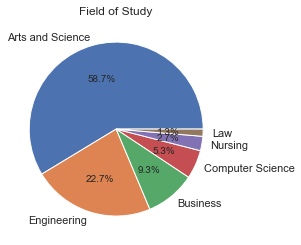

In [49]:
# make a pie chart out of field_of_study
field_of_study = pp_data['field_of_study'].value_counts()
# field_of_study.plot.pie(autopct='%1.1f%%')
plt.pie(field_of_study, labels=field_of_study.index, autopct='%1.1f%%')

plt.title('Field of Study')
plt.show()

## SQ2. Education Level

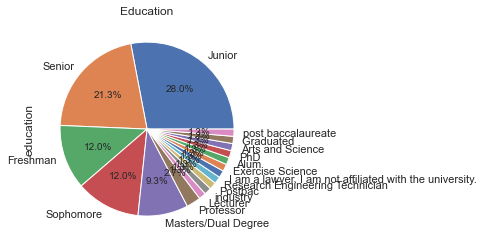

In [51]:
education = pp_data['education'].value_counts()
education.plot.pie(autopct='%1.1f%%')
plt.title('Education')
plt.show()

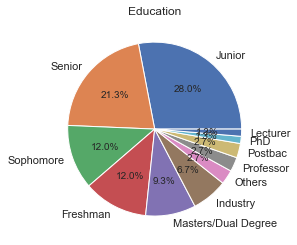

In [58]:
# post-bac
education = pp_data['education']
education = education.replace('post baccalaureate ', 'Postbac')
# arts and science?
education = education.replace('Arts and Science ', 'Others')
education = education.replace('Graduated ', 'Industry')
education = education.replace('Exercise Science ', 'Industry')
education = education.replace('industry', 'Industry')
education = education.replace('I am a lawyer. I am not affiliated with the university. ', 'Industry')
education = education.replace('Research Engineering Technician ', 'Academia')
education = education.replace('Alum', 'Industry')


education_ct = education.value_counts()
plt.pie(education_ct, labels=education_ct.index, autopct='%1.1f%%')

plt.title('Education')
plt.show()

## SQ3. Familiarity - use figures from Google Forms, mean and median computed below


In [60]:
# mean and median of familiarity
familiarity = pp_data['familiarity']
mean = familiarity.mean()
median = familiarity.median()
print(f'Mean: {mean}')
print(f'Median: {median}')

Mean: 4.24
Median: 5.0


## SQ4. Initial trust - use figures from Google Forms, mean and median computed below

In [59]:
# mean and median of initial trust 
initial_trust = pp_data['initial_trust']
mean = initial_trust.mean()
median = initial_trust.median()
print(f'Mean: {mean}')
print(f'Median: {median}')

Mean: 4.8533333333333335
Median: 5.0


## SQ5. Experience with LLMs

In [ ]:
# word cloud using 

# Data Analysis

In [6]:
# Descriptive statistics
print("Descriptive Statistics:")
print(pp_data [['familiarity', 'initial_trust', 'final_trust']].describe())

# Calculating mode (note: mode could be multi-modal)
print("\nMode:")
print(pp_data [['familiarity', 'initial_trust', 'final_trust']].mode().head(1))



Descriptive Statistics:
       familiarity  initial_trust  final_trust
count    75.000000      75.000000    75.000000
mean      4.240000       4.853333     3.986667
std       2.335623       2.018116     2.010065
min       1.000000       1.000000     1.000000
25%       2.000000       3.000000     3.000000
50%       5.000000       5.000000     4.000000
75%       6.000000       6.000000     5.000000
max      10.000000      10.000000    10.000000

Mode:
   familiarity  initial_trust  final_trust
0          5.0            5.0            3


## Simple linear regression analysis to explore relationships between variables familiarity with LLMs and initial trust levels.

In [7]:
import statsmodels.api as sm

# Simple linear regression
X = sm.add_constant(pp_data['familiarity'])  # adding a constant
Y = pp_data['initial_trust']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          initial_trust   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5310
Date:                Sat, 27 Apr 2024   Prob (F-statistic):              0.469
Time:                        16:46:39   Log-Likelihood:                -158.31
No. Observations:                  75   AIC:                             320.6
Df Residuals:                      73   BIC:                             325.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.5420      0.487      9.326      

### Response Analysis

From the OLS regression results, we can gather several insights:

1. **R-squared**: The R-squared value is 0.013, which indicates that only about 1.3% of the variation in initial trust levels is explained by the variation in familiarity with LLMs. This suggests that familiarity with LLMs alone does not strongly predict initial trust levels.

2. **Coefficient Estimates**: The coefficient for the variable "familiarity" is 0.0989. This suggests that for every one-unit increase in familiarity with LLMs, initial trust levels increase by approximately 0.0989 units. However, since the coefficient is not statistically significant (p-value = 0.324), we cannot conclude that this relationship is not likely due to random chance.

3. **Intercept**: The intercept (const) is 4.4704. This represents the estimated initial trust level when familiarity with LLMs is zero.

4. **Statistical Significance**: The p-values associated with the coefficient estimates provide information about their statistical significance. In this case, the p-value for the coefficient of "familiarity" is 0.324, which is greater than the typical significance level of 0.05. This suggests that familiarity with LLMs is not a statistically significant predictor of initial trust levels in this model.

5. **Model Fit**: The F-statistic is 0.9850 with a associated probability of 0.324. This suggests that the overall fit of the model is not statistically significant, further indicating that familiarity with LLMs alone may not be a strong predictor of initial trust levels.

6. **Assumptions**: The assumptions of linear regression (e.g., normality of residuals, homoscedasticity) should be assessed to ensure the validity of the model results.

In summary, based on these results, familiarity with LLMs does not appear to be a significant predictor of initial trust levels. Additional factors or a more complex model may be needed to better understand the determinants of initial trust in LLMs.

### lda word cloud

In [8]:
# analyze experience using scikit lda and visualize using wordcloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from wordcloud import WordCloud
from tokenizers import Tokenizer
from tokenizers.models import BPE
from transformers import PreTrainedTokenizerFast
import re, nltk, spacy, gensim
from transformers import AutoTokenizer



In [9]:
from spacy.lang.en import stop_words as stop_words

# remove NaN values
experience_data = pp_data['experience'].dropna()

# lowercase the data
experience_data = experience_data.str.lower()

# tokenize the data using spaCy
nlp = spacy.load('en_core_web_sm')
experience_data = experience_data.apply(lambda x: nlp(x))
# print(experience_data)

# remove stop words
experience_data = experience_data.apply(lambda x: [token for token in x if not token.is_stop])
# print(experience_data)

# remove special characters
experience_data = experience_data.apply(lambda x: [token for token in x if token.is_alpha])

# lemmatize the data
experience_data = experience_data.apply(lambda x: [token.lemma_ for token in x])




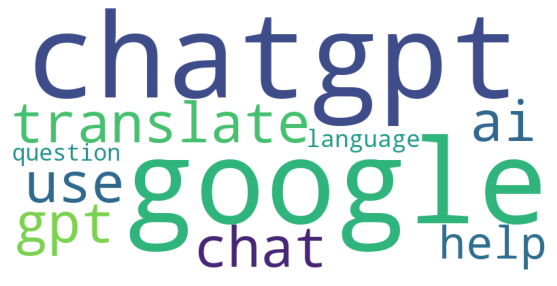

In [10]:
# lda
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(experience_data.apply(lambda x: ' '.join(x)))

lda_model = LDA(n_components=1, learning_method='online', random_state=0, n_jobs=-1)
lda_output = lda_model.fit_transform(data_vectorized)

# visualize lda
# get the feature names
words = vectorizer.get_feature_names_out()
# get the topic names
# topic_names = ['Topic' + str(i) for i in range(lda_model.n_components)]
# make the wordcloud
for i, topic in enumerate(lda_model.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([words[i] for i in topic.argsort()[:-10 - 1:-1]]))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    # plt.title('')
    plt.show()

## sentiment analysis on fingerprinting

In [11]:
# huggingface sentiment analysis on fingerprint

# load the sentiment analysis pipeline
sentiment_analysis = pipeline(model='nlptown/bert-base-multilingual-uncased-sentiment')

# analyze the fingerprint data
fingerprint_data = pp_data['fingerprint'].dropna()
fingerprint_data = fingerprint_data.to_list()
print(fingerprint_data)

# analyze the sentiment of the fingerprint data
sentiment_results = sentiment_analysis(fingerprint_data)
print(sentiment_results)




Downloading:   0%|          | 0.00/3.61k [00:00<?, ?B/s]

['Na', 'I think there are arguments on both sides.  I don’t believe in surveillance especially by the government or police, so I think if llms can do this, access to this information should be HIGHLY restricted and require a lot of red tape to go through to access.  But, as the technologies are being abused right now, it may be important to store information of users who are conducting illegal activity with the help of llm.', 'BA', 'interview', 'Yes, but fingerprints are also used often for passcodes', 'No', 'No', 'I don’t think they should, as this could put them at risk of leaking their biometric data?', 'Yes', 'No', 'Interview', 'Not at all', 'No', 'No, this will lead to an easier way of Identification theft ', 'No, i think user input should be anonymous. Tying the user to their data far increases the risk of harm in the event that there is a data breach.', 'interview ', "Not at the moment, but I wouldn't find it unsurprising that this capability could be achieved. ", 'No', "I don't

    label     score
0       3  0.254155
1       2  0.392857
2       3  0.353616
3       5  0.329108
4       3  0.495082
5       1  0.531922
6       1  0.531922
7       2  0.370232
8       5  0.379079
9       1  0.531922
10      5  0.329108
11      1  0.727320
12      1  0.531922
13      2  0.353402
14      1  0.357564
15      5  0.329108
16      3  0.567687
17      1  0.531922
18      3  0.406282
19      3  0.539630
20      1  0.258234
21      1  0.862827
22      3  0.633228
23      3  0.609374
24      1  0.582546
25      4  0.451561
26      1  0.857431
27      3  0.514611
28      1  0.694097
29      4  0.346079
30      3  0.540843
31      1  0.531922
32      2  0.418525
33      1  0.531922
34      1  0.582546
35      2  0.535161
36      3  0.313697
37      1  0.421938
38      2  0.435160
39      2  0.482752
40      5  0.379079
41      1  0.853026
42      3  0.524376
43      1  0.531922
44      1  0.582546
45      2  0.357737
46      5  0.329108
47      2  0.403428
48      2  0.402200


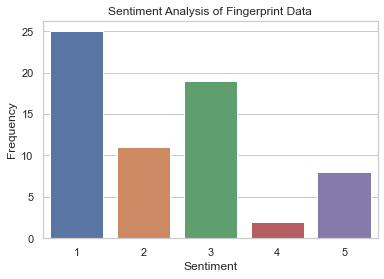

In [12]:
# visualize the sentiment of the fingerprint data
sentiment_results = pd.DataFrame(sentiment_results)
# change the 1 star to 1
sentiment_results['label'] = sentiment_results['label'].replace('1 star', 1)
# change the 2 star to 2
sentiment_results['label'] = sentiment_results['label'].replace('2 stars', 2)
# change the 3 star to 3
sentiment_results['label'] = sentiment_results['label'].replace('3 stars', 3)
# change the 4 star to 4
sentiment_results['label'] = sentiment_results['label'].replace('4 stars', 4)
# change the 5 star to 5
sentiment_results['label'] = sentiment_results['label'].replace('5 stars', 5)

print(sentiment_results)

# plot the sentiment of the fingerprint data
sns.countplot(x='label', data=sentiment_results)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis of Fingerprint Data")

# show frequency of sentiment

plt.show()
# plt.title("Sentiment Analysis of Fingerprint Data")
# plt.show()


### familiarity and trust

In [13]:
# load initial trust and final trust data
initial_trust = pp_data['initial_trust']
initial_trust = initial_trust.dropna()
# load familiarity data
familiarity = pp_data['familiarity']
familiarity = familiarity.dropna()
# correlation between familiarity and initial trust
correlation = familiarity.corr(initial_trust, method='pearson')
print("Correlation between familiarity and initial trust: ", correlation)

# correlation between familiarity and final trust
final_trust = pp_data['final_trust']
final_trust = final_trust.dropna()
correlation = familiarity.corr(final_trust, method='pearson')
print("Correlation between familiarity and final trust: ", correlation)

# correlation between initial trust and final trust
correlation = initial_trust.corr(final_trust, method='pearson')
print("Correlation between initial trust and final trust: ", correlation)

# get the mean of initial trust
initial_trust_mean = pp_data['initial_trust'].mean()
print("Mean of initial trust: ", initial_trust_mean)

# get the median of initial trust
initial_trust_median = pp_data['initial_trust'].median()
print("Median of initial trust: ", initial_trust_median)

# get the mean of final trust
final_trust_mean = pp_data['final_trust'].mean()
print("Mean of final trust: ", final_trust_mean)

# get the median of final trust
final_trust_median = pp_data['final_trust'].median()
print("Median of final trust: ", final_trust_median)


Correlation between familiarity and initial trust:  0.08497625065211331
Correlation between familiarity and final trust:  0.23384354569388202
Correlation between initial trust and final trust:  0.7890264696195952
Mean of initial trust:  4.8533333333333335
Median of initial trust:  5.0
Mean of final trust:  3.986666666666667
Median of final trust:  4.0


### demographics of the participants


,field_of_study
0,Arts and Science
1,Arts and Science
2,Arts and Science
3,Arts and Science
4,Arts and Science
5,Arts and Science
6,Arts and Science
7,Business
8,Arts and Science
9,Arts and Science


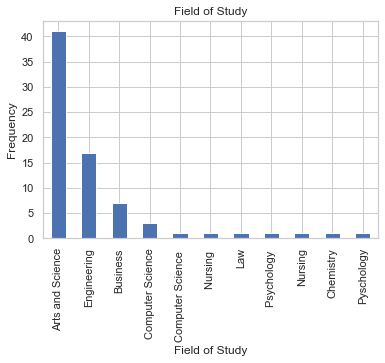

In [14]:
# field of study, education, familiarity, initial trust, and experience
# analyze field of study
field_of_study_data = pp_data['field_of_study'].dropna()
# do not truncate the data
field_of_study_data=pd.DataFrame(field_of_study_data)
pd.set_option('display.max_rows', None)

# display(field_of_study_data)

# merge psychology into arts and science
field_of_study_data['field_of_study'] = field_of_study_data['field_of_study'].replace('Psychology', 'Arts and Science')

# rename legal studies to law
field_of_study_data['field_of_study'] = field_of_study_data['field_of_study'].replace('Legal (practicing attorney)', 'Law')

display(field_of_study_data)
# plot using plt
field_of_study_data['field_of_study'].value_counts().plot(kind='bar')
plt.xlabel("Field of Study")
plt.ylabel("Frequency")
plt.title("Field of Study")
plt.show()


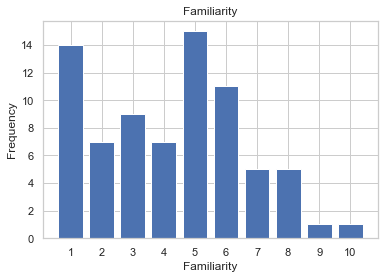

Mean of familiarity:  4.24
Median of familiarity:  5.0


In [15]:
# plot familiarity
familiarity_data = pp_data['familiarity'].dropna()
familiarity_data = familiarity_data.value_counts()
plt.bar(familiarity_data.index, familiarity_data.values)

# show all xticks
plt.xticks(familiarity_data.index)
plt.xlabel("Familiarity")
plt.ylabel("Frequency")
plt.title("Familiarity")
plt.show()

# get the mean of familiarity
familiarity_mean = pp_data['familiarity'].mean()
print("Mean of familiarity: ", familiarity_mean)

# get median of familiarity
familiarity_median = pp_data['familiarity'].median()
print("Median of familiarity: ", familiarity_median)

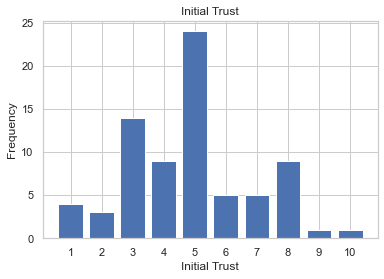

Mean of initial trust:  4.8533333333333335
Median of initial trust:  5.0


In [16]:
# analyze initial trust
initial_trust_data = pp_data['initial_trust'].dropna()
initial_trust_data = initial_trust_data.value_counts()
plt.bar(initial_trust_data.index, initial_trust_data.values)

# show all xticks
plt.xticks(initial_trust_data.index)
plt.xlabel("Initial Trust")
plt.ylabel("Frequency")
plt.title("Initial Trust")
plt.show()

# get the mean of initial trust
initial_trust_mean = pp_data['initial_trust'].mean()
print("Mean of initial trust: ", initial_trust_mean)

# get median of initial trust
initial_trust_median = pp_data['initial_trust'].median()
print("Median of initial trust: ", initial_trust_median)


In [17]:
# analyze experience

### testing tf idf method

In [18]:
# make a corpus for privacy concern
privacy_concern_data = pp_data['privacy_concern'].dropna()
privacy_concern_data = privacy_concern_data.str.lower()
privacy_concern_data = privacy_concern_data.str.split()
privacy_concern_data = privacy_concern_data.apply(lambda x: ' '.join(x))
privacy_concern_data = pd.DataFrame(privacy_concern_data)
pd.set_option('display.max_colwidth', None) 
display(privacy_concern_data)


,privacy_concern
0,na
2,i know that washu has a private gpt server for faculty and students to use that keeps the universities research and private information secure. another way could just be to restrict the use of public llm services for private information. like right now it is just not responsible for companies with sensitive information to consult gpt on questions about that information.
4,interview
5,"they might collate data about a person to find password options, as it’s common to use combinations of birthdays, pet names, etc. as passwords."
8,n/a
9,"depending on the model, they could be hacked (?) which could compromise security. measures like human oversight could protect against this"
10,llms should advise users against inputing sensitive data.
11,sell user info
12,interview
13,uhh don’t use llm’s or use a local version running on your own hardware.


In [19]:
# tokenize the data using spaCy
nlp = spacy.load('en_core_web_sm')
privacy_concern_data_pp = privacy_concern_data['privacy_concern'].apply(lambda x: nlp(x))
# remove special characters
privacy_concern_data_pp = privacy_concern_data_pp.apply(lambda x: [token for token in x if token.is_alpha])
# remove stop words
privacy_concern_data_pp = privacy_concern_data_pp.apply(lambda x: [token for token in x if not token.is_stop])
# lemmatize the data
privacy_concern_data_pp = privacy_concern_data_pp.apply(lambda x: [token.lemma_ for token in x])
# aggregate everything into one list
privacy_concern_data_pp = privacy_concern_data_pp.sum()



print(privacy_concern_data_pp)

['na', 'know', 'washu', 'private', 'gpt', 'server', 'faculty', 'student', 'use', 'keep', 'university', 'research', 'private', 'information', 'secure', 'way', 'restrict', 'use', 'public', 'llm', 'service', 'private', 'information', 'like', 'right', 'responsible', 'company', 'sensitive', 'information', 'consult', 'gpt', 'question', 'information', 'interview', 'collate', 'datum', 'person', 'find', 'password', 'option', 'common', 'use', 'combination', 'birthday', 'pet', 'name', 'etc', 'password', 'n', 'depend', 'model', 'hack', 'compromise', 'security', 'measure', 'like', 'human', 'oversight', 'protect', 'llm', 'advise', 'user', 'input', 'sensitive', 'datum', 'sell', 'user', 'info', 'interview', 'uhh', 'use', 'llm', 'use', 'local', 'version', 'run', 'hardware', 'user', 'private', 'information', 'avoid', 'share', 'personal', 'information', 'llm', 'end', 'datum', 'provide', 'user', 'risk', 'properly', 'secure', 'send', 'llm', 'server', 'people', 'likely', 'personal', 'information', 'prompt',

In [20]:
# use tf-idf to analyze the data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


# use tf-idf to analyze the data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(privacy_concern_data_pp)
# get idf values
print('\nidf values:')
feature_names = tfidf_vectorizer.get_feature_names_out()
for ele1, ele2 in zip(feature_names, tfidf_vectorizer.idf_):
    print(ele1, ':', ele2)




idf values:
ability : 6.634789603169249
able : 5.718498871295094
abt : 6.634789603169249
access : 5.718498871295094
accidentally : 6.2293244950610855
account : 6.634789603169249
accurate : 6.634789603169249
actor : 6.634789603169249
add : 6.634789603169249
advise : 6.634789603169249
aggregate : 6.634789603169249
agreement : 6.634789603169249
ai : 5.941642422609304
allow : 6.2293244950610855
answer : 6.634789603169249
art : 6.634789603169249
artist : 6.634789603169249
ask : 6.2293244950610855
assistant : 6.634789603169249
attack : 6.2293244950610855
augmentation : 6.634789603169249
automatically : 6.634789603169249
avoid : 6.2293244950610855
awareness : 6.634789603169249
bad : 6.2293244950610855
ban : 6.634789603169249
base : 6.2293244950610855
behavior : 6.634789603169249
big : 6.634789603169249
birthday : 6.634789603169249
bit : 6.634789603169249
blind : 6.634789603169249
breach : 6.634789603169249
breaker : 6.634789603169249
cache : 6.634789603169249
capable : 6.634789603169249
care

In [21]:
# get tf values
print('\ntf values:')
for ele1, ele2 in zip(feature_names, tfidf_matrix.toarray()[0]):
    if ele2 != 0:
        print(ele1, ':', ele2)




tf values:
na : 1.0


In [22]:
# count the frequency of each word
from collections import Counter
word_freq = Counter(privacy_concern_data_pp)
print('\nword frequency:')
print(word_freq)

# get the most common words
print('\nmost common words:')
print(word_freq.most_common(10))



word frequency:
Counter({'information': 37, 'llm': 30, 'user': 20, 'datum': 15, 'use': 12, 'personal': 11, 'people': 11, 'sensitive': 9, 'private': 7, 'security': 7, 'model': 6, 'leak': 6, 'think': 6, 'interview': 5, 'protect': 5, 'risk': 5, 'sure': 5, 'way': 4, 'like': 4, 'person': 4, 'measure': 4, 'share': 4, 'prompt': 4, 'able': 4, 'privacy': 4, 'access': 4, 'know': 3, 'server': 3, 'company': 3, 'password': 3, 'compromise': 3, 'input': 3, 'sell': 3, 'provide': 3, 'steal': 3, 'pose': 3, 'implement': 3, 'collect': 3, 'ai': 3, 'history': 3, 'train': 3, 'give': 3, 'create': 3, 'training': 3, 'manipulate': 3, 'gpt': 2, 'student': 2, 'secure': 2, 'restrict': 2, 'public': 2, 'question': 2, 'hack': 2, 'human': 2, 'avoid': 2, 'encryption': 2, 'point': 2, 'possibly': 2, 'lot': 2, 'voice': 2, 'base': 2, 'prevent': 2, 'certain': 2, 'thing': 2, 'cybersecurity': 2, 'exploit': 2, 'life': 2, 'allow': 2, 'help': 2, 'accidentally': 2, 'bad': 2, 'government': 2, 'ask': 2, 'store': 2, 'data': 2, 'hone

In [23]:
# use k-means to cluster the data
kmeans = KMeans(n_clusters=3).fit(tfidf_matrix)
clusters = kmeans.labels_

# get the top terms
terms = tfidf_vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(len(kmeans.cluster_centers_)):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Cluster 0:
 user
 datum
 use
 people
 personal
 sensitive
 security
 private
 think
 leak
Cluster 1:
 information
 writer
 hack
 function
 future
 generate
 government
 gpt
 hacker
 idea
Cluster 2:
 llm
 feel
 honestly
 history
 helpful
 help
 harmful
 hardware
 hacker
 hack


/Users/ben/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
# topic modeling for privacy_concern_data using 


### categorization

In [25]:
from nltk.tokenize import word_tokenize
                        

                                              Category  Frequency
5                                     privacy breaches          8
13                                      misinformation          5
9                                      data harvesting          5
21                            insecure code generation          4
3                                            interview          4
4                                     incorrect output          4
8                           usage of unverfied sources          4
10                misinformation and false information          4
26                                      data poisoning          3
41                            protecting patient files          2
17                       unverified information output          2
32                                          deep fakes          2
14                        decrease in human creativity          2
16                                   selling user data          2
23        

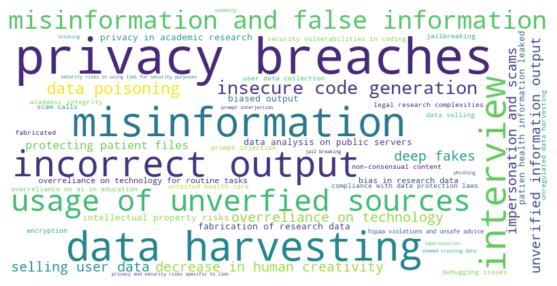

In [26]:
# 'vulnerable_encoding', 'positive_tasks_encoding', 
#     'exploitative_tasks_encoding', 'effects_encoding', 'risks_encoding'
# Splitting comma-separated entries and counting
category_counter = Counter()

def preprocess(text):
    if pd.isna(text) or text.strip() == "":
        return None  # Return None to indicate invalid or empty entry
    text = text.strip().lower()
    # replacements = {
    #     'Data Security and Privacy': 'data science', 'data sciences': 'data science',
    #     'Healthcare and Patient Data': 'customer service', 'customers service': 'customer service',
    #     'Code and Software Development': 'software development', 'software dev': 'software development', 'software developmentelopment': 'software development',
    #     'Legal and Compliance Issues': 'arts and entertainment', 'art and entertainment': 'arts and entertainment',
    #     'Education and Research': 'healthcare', 
    #     'General Concerns': 'healthcare',
    #     'Miscellaneous':''
    # }
    # for key, value in replacements.items():
    #     text = text.replace(key, value)
    return text

# Splitting comma-separated entries and counting
category_counter = Counter()
for entry in pp_data['increased_reliance_encoding']:
    if pd.notna(entry):  # Only process if entry is not NaN
        categories = entry.split(',')
        categories = [preprocess(cat) for cat in categories if preprocess(cat)]
        category_counter.update(categories)

# Converting counter to DataFrame for display
category_df = pd.DataFrame(category_counter.items(), columns=['Category', 'Frequency'])
category_df = category_df.sort_values(by='Frequency', ascending=False)
print(category_df)

# Optionally, you can generate a word cloud to visualize the frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
# Define main categories and their corresponding detailed categories
import pandas as pd

# Predefined category classifications
increased_reliance_encoding = {

    'data security and privacy': [
                                    'data analysis on public servers', 
                                    'intellectual property risks', 
                                    'privacy in academic research', 
                                    'data selling' , 
                                    'deep fakes',
                                    'data harvesting'
                                    ],

    'healthcare and patient data': [
                                    'patient interaction',
                                    'PHI access',
                                    'protecting patient files',
                                    'HIPAA violations and unsafe advice'
                                    ],

    'code and software development': [
                                    'security vulnerabilities in coding', 
                                    'debugging issues', 
                                    'jailbreaking',
                                    'data poisoning',
                                    'prompt injection'
                                    ],

    'legal and compliance issues': [
                                    'privacy breaches', 
                                    'legal research complexities', 
                                    'compliance with data protection laws'
                                    ],

    'education and research': [
                                'academic integrity', 
                                'bias in research data', 
                                'overreliance on AI in education'
                                ],

    'general concerns': [
                        'misinformation and false information', 
                        'selling user data', 
                        'impersonation and scams'
                        ],
                        
    'miscellaneous': []  # Will include categories not explicitly mapped
}

# Function to map individual categories to main categories
def map_category_to_main(cat, mapping):
    for main_category, subcats in mapping.items():
        if cat in subcats:
            return main_category
    return 'other'

# Map each category to its corresponding main category
category_df['Main Category'] = category_df['Category'].apply(lambda x: map_category_to_main(x, increased_reliance_encoding))

# Aggregate frequencies by main categories
final_counts = category_df.groupby('Main Category').agg({
    'Frequency': 'sum',
    'Category': lambda x: ', '.join(sorted(set(x)))  # Collect unique subcategories
}).reset_index()

# Calculate total percentages
total_frequency = final_counts['Frequency'].sum()
final_counts['Percent'] = (final_counts['Frequency'] / total_frequency * 100).round(1)

# Print the final categorized DataFrame
print(final_counts)


def style_table(df, name):
    return df.style\
             .set_properties(**{'text-align': 'left'})\
             .set_table_styles([
                 {'selector': 'th', 'props': [('text-align', 'left')]},  # Ensures headers are left-aligned
                 {'selector': 'tr', 'props': [('background-color', '')]}  # Resets any row background color styling
             ])\
             .set_caption("Distribution of" + name)\
             .format({'Percent': "{:.1f}%"})  # Format percent with two decimal places

styled_table = style_table(final_counts, " vulnerable sectors")
display(styled_table)



                   Main Category  Frequency  \
0  code and software development          7   
1      data security and privacy         11   
2         education and research          2   
3               general concerns          8   
4    healthcare and patient data          2   
5    legal and compliance issues         10   
6                          other         49   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

,Main Category,Frequency,Category,Percent
0,code and software development,7,"data poisoning, debugging issues, jailbreaking, prompt injection, security vulnerabilities in coding",7.9%
1,data security and privacy,11,"data analysis on public servers, data harvesting, data selling, deep fakes, intellectual property risks, privacy in academic research",12.4%
2,education and research,2,"academic integrity, bias in research data",2.2%
3,general concerns,8,"impersonation and scams, misinformation and false information, selling user data",9.0%
4,healthcare and patient data,2,protecting patient files,2.2%
5,legal and compliance issues,10,"compliance with data protection laws, legal research complexities, privacy breaches",11.2%
6,other,49,"biased output, decrease in human creativity, encryption, fabricated, fabrication of research data, hipaa violations and unsafe advice, impersonation, incorrect output, insecure code generation, interview, jail breaking, misinformation, non-consensual content, overreliance on ai in education, overreliance on technology, overreliance on technology for routine tasks, patien health information leaked, phishing, privacy and security risks specific to llms, prompt interjection, scam calls, security risks in using llms for security purposes, skewed training data, spamming, stalking, unregulated data harvesting, untested health care, unverified information output, usage of unverfied sources, user data collection",55.1%


                                              Category  Frequency
5                                     privacy breaches          8
13                                      misinformation          5
9                                      data harvesting          5
21                            insecure code generation          4
3                                            interview          4
4                                     incorrect output          4
8                           usage of unverfied sources          4
10                misinformation and false information          4
26                                      data poisoning          3
41                            protecting patient files          2
17                       unverified information output          2
32                                          deep fakes          2
14                        decrease in human creativity          2
16                                   selling user data          2
23        

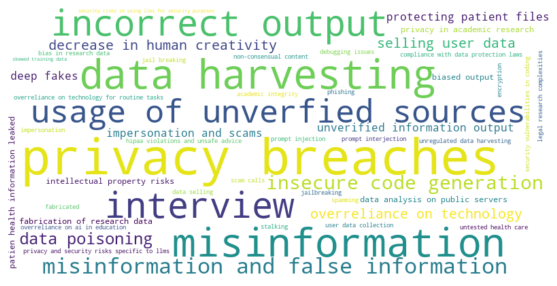

In [28]:
# 'vulnerable_encoding', 'positive_tasks_encoding', 
#     'exploitative_tasks_encoding', 'effects_encoding', 'risks_encoding'
# Splitting comma-separated entries and counting
category_counter = Counter()

# def preprocess(text):
#     if pd.isna(text) or text.strip() == "":
#         return None  # Return None to indicate invalid or empty entry
#     text = text.strip().lower()
#     replacements = {
#         'performe routine tasks': 'perform routine tasks',
#         'tasks organization': 'task organization',
#         'peform routine tasks': 'perform routine tasks',
#         'fiancial models': 'financial models',  
#         'government': 'in the government', 
#         'writing code': 'coding', 'personalized ads': 'personalized advertising', 'personal advertising': 'personalized advertising' 
#     }
#     for key, value in replacements.items():
#         text = text.replace(key, value)
#     return text

# Splitting comma-separated entries and counting
category_counter = Counter()
for entry in pp_data['increased_reliance_encoding']:
    if pd.notna(entry):  # Only process if entry is not NaN
        categories = entry.split(',')
        categories = [preprocess(cat) for cat in categories if preprocess(cat)]
        category_counter.update(categories)

# Converting counter to DataFrame for display
category_df = pd.DataFrame(category_counter.items(), columns=['Category', 'Frequency'])
category_df = category_df.sort_values(by='Frequency', ascending=False)
print(category_df)

# Optionally, you can generate a word cloud to visualize the frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()